In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [28]:
x,y = make_regression(n_samples=100, n_features=20, n_informative=20, noise=10, random_state=2)

In [29]:
u = np.mean(x,axis= 0)
std = np.std(x,axis= 0)
x = (x-u)/std

In [30]:
ones = np.ones((x.shape[0],1))
x = np.hstack((ones,x))

In [31]:
def hypothesis(x,theta):
  y_ = 0.0
  n = x.shape[0]
  for i in range(n):
    y_ += (theta[i]*x[i])
  return y_

def error(x,y,theta):
  e = 0.0
  m = x.shape[0]
  for i in range(m):
    y_ = hypothesis(x[i],theta)
    e += (y[i]-y_)**2
  return e/m

def gradient(x,y,theta):
  m,n = x.shape
  grad = np.zeros((n,))
  for j in range(n):
    for i in range(m):
      y_ = hypothesis(x[i],theta)
      grad[j] += (y_-y[i])*x[i][j]
  return grad/m

def gradient_descent(x,y,learning_rate=0.01,epochs=300):
  m,n = x.shape
  theta = np.zeros((n,))
  error_list = []
  for i in range(epochs):
    e = error(x,y,theta)
    error_list.append(e)
    grad = gradient(x,y,theta)
    for j in range(n):
      theta[j] = theta[j] - learning_rate*grad[j]
  return theta,error_list

In [58]:
theta, error_list = gradient_descent(x,y)

1125.7599949532942


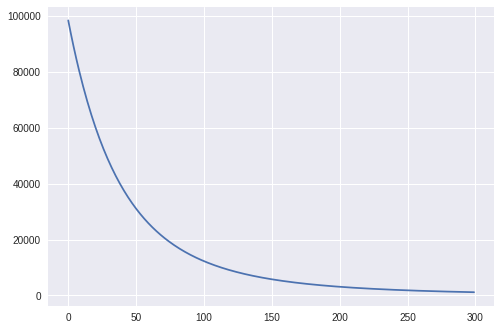

In [59]:
print(error_list[-1])
plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

In [62]:
def mini_batch_gradient_descent(x,y,batch_size=5,learning_rate=0.01,epochs= 20):
  m,n = x.shape
  theta = np.zeros((n,))
  error_list = []
  data = np.hstack((x,y.reshape(-1,1)))
  for i in range(epochs):
    np.random.shuffle(data)
    m = data.shape[0]
    batches = m//batch_size
    for i in range(batches):
      batch_data = data[i*batch_size:(i+1)*batch_size,:]
      x_batch = batch_data[:,:-1]
      y_batch = batch_data[:,-1]
      e = error(x_batch,y_batch,theta)
      error_list.append(e)
      batch_gradient = gradient(x_batch, y_batch, theta)
      theta = theta - learning_rate*batch_gradient
  return theta,error_list

In [63]:
np.seterr(divide='ignore', invalid='ignore')
theta, error_list = mini_batch_gradient_descent(x,y)

350.9835385175171


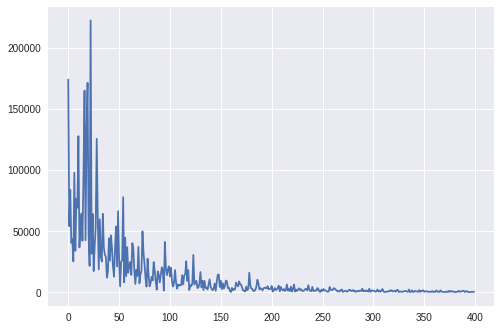

In [64]:
print(error_list[-1])
plt.figure()
plt.style.use('seaborn')
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

Mini Batch advantages - 


1.   faster convergence
2.   noisy updates - help in avoiding local minima. curve is more robust

1.   Vectorization
2.   No need to load entire data set in the memory in one go. you can pipeline the data and add the bacth in the memory which is required.



